In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

In [2]:
train_df = pd.read_csv('OnlineNewsPopularity.csv')

print('///////////////////////')
print(train_df.head())
print('///////////////////////')
print(test_df.head())

///////////////////////
                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0

NameError: name 'test_df' is not defined

In [3]:
train_df = pd.read_csv('OnlineNewsPopularity.csv')

print('///////////////////////')
print(train_df.head(1).T)
print('///////////////////////')
print(train_df.head(1).T)

///////////////////////
                                                                               0
url                            http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                 731.0
 n_tokens_title                                                             12.0
 n_tokens_content                                                          219.0
 n_unique_tokens                                                        0.663594
...                                                                          ...
 title_subjectivity                                                          0.5
 title_sentiment_polarity                                                -0.1875
 abs_title_subjectivity                                                      0.0
 abs_title_sentiment_polarity                                             0.1875
 shares                                                                      593

[61

In [4]:
print('Обучающая выборка: \t', train_df.shape)

Обучающая выборка: 	 (39644, 61)


In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Ряд с датами (по timedelta):
0   2013-11-07 00:12:11
1   2013-11-07 00:12:11
2   2013-11-07 00:12:11
3   2013-11-07 00:12:11
4   2013-11-07 00:12:11
Name:  timedelta, dtype: datetime64[ns]
Размер объекта Series:  (39644,)


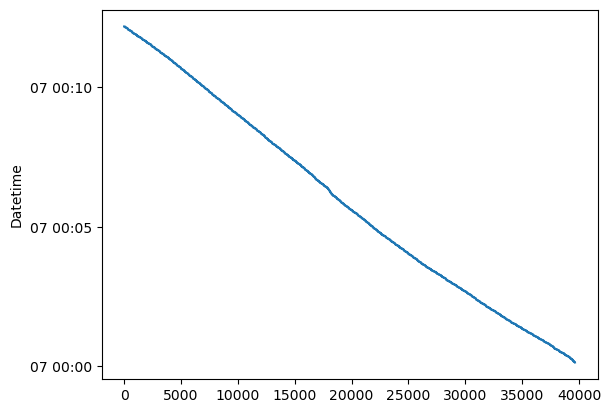

In [6]:
ser_data = pd.to_timedelta(train_df[' timedelta'], unit='s') + pd.Timestamp('2013-11-07')
print('Ряд с датами (по timedelta):')
print(ser_data.head())
print('Размер объекта Series: ', ser_data.shape)

plt.plot(ser_data)
plt.ylabel('Datetime')
plt.show()

In [7]:
corr = train_df.select_dtypes(include=[np.number]).corr()
corr

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


In [8]:
corr[corr>0.9].replace({np.nan : ''})

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.0,,,,,,,,,,...,,,,,,,,,,
n_tokens_title,,1.0,,,,,,,,,...,,,,,,,,,,
n_tokens_content,,,1.0,,,,,,,,...,,,,,,,,,,
n_unique_tokens,,,,1.0,0.999572,0.999852,,,,,...,,,,,,,,,,
n_non_stop_words,,,,0.999572,1.0,0.999532,,,,,...,,,,,,,,,,
n_non_stop_unique_tokens,,,,0.999852,0.999532,1.0,,,,,...,,,,,,,,,,
num_hrefs,,,,,,,1.0,,,,...,,,,,,,,,,
num_self_hrefs,,,,,,,,1.0,,,...,,,,,,,,,,
num_imgs,,,,,,,,,1.0,,...,,,,,,,,,,
num_videos,,,,,,,,,,1.0,...,,,,,,,,,,


In [9]:
df = train_df.copy()
df['year'] = (pd.to_timedelta(df[' timedelta'], unit='s') + pd.Timestamp('2013-11-07')).dt.year
ss = df['year'].value_counts()
print(ss.sort_index())

year
2013    39644
Name: count, dtype: int64


In [12]:
features = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs']  
train_size = int(0.7 * train_df.shape[0])
print('Размер исходного набора: ', len(train_df), 
      '\nРазмер обучающей подвыборки: ', train_size)

X = train_df[features]
y = train_df[' shares']

X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]

Размер исходного набора:  39644 
Размер обучающей подвыборки:  27750


In [13]:
train_df.columns = train_df.columns.str.strip()
X_train.columns = X_train.columns.str.strip()
X_valid.columns = X_valid.columns.str.strip()

In [14]:
train_df.columns = train_df.columns.str.strip()

features = ['title_subjectivity', 'title_sentiment_polarity', 
            'abs_title_subjectivity', 'abs_title_sentiment_polarity']

train_size = int(0.7 * train_df.shape[0])

X = train_df[features]
y = train_df['shares'] 

X_train = X.iloc[:train_size, :]
X_valid = X.iloc[train_size:, :]
y_train = y.iloc[:train_size]
y_valid = y.iloc[train_size:]

X_train_title = X_train[features]
X_valid_title = X_valid[features]

print('X_train_title.shape: ', X_train_title.shape)
print('X_valid_title.shape: ', X_valid_title.shape)

X_train_title.shape:  (27750, 4)
X_valid_title.shape:  (11894, 4)


In [15]:
X_train_title, X_valid_title

(       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
 0                0.500000                 -0.187500                0.000000   
 1                0.000000                  0.000000                0.500000   
 2                0.000000                  0.000000                0.500000   
 3                0.000000                  0.000000                0.500000   
 4                0.454545                  0.136364                0.045455   
 ...                   ...                       ...                     ...   
 27745            0.600000                  0.500000                0.100000   
 27746            0.000000                  0.000000                0.500000   
 27747            0.200000                 -0.200000                0.300000   
 27748            0.000000                  0.000000                0.500000   
 27749            0.750000                  0.550000                0.250000   
 
        abs_title_sentiment_polarity  

In [16]:
features_title = ['title_subjectivity', 'title_sentiment_polarity', 
                  'abs_title_subjectivity', 'abs_title_sentiment_polarity']

train_size = int(0.7 * train_df.shape[0])

X = train_df[features_title]
y = train_df['shares'] 

X_train = X.iloc[:train_size, :]
X_valid = X.iloc[train_size:, :]
y_train = y.iloc[:train_size]
y_valid = y.iloc[train_size:]

X_train_title = X_train[features_title]
X_valid_title = X_valid[features_title]

print('X_train_title.shape: ', X_train_title.shape)
print('X_valid_title.shape: ', X_valid_title.shape)

X_train_title.shape:  (27750, 4)
X_valid_title.shape:  (11894, 4)


In [19]:
X_train = train_df.copy()
X_valid = train_df.copy()

In [20]:
feats = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
         'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
         'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length']

vectorizer_feats = DictVectorizer()

tmp_dict_train = X_train[feats].fillna('-').to_dict(orient='records')
tmp_dict_valid = X_valid[feats].fillna('-').to_dict(orient='records')

X_train_feats = vectorizer_feats.fit_transform(tmp_dict_train)
X_valid_feats = vectorizer_feats.transform(tmp_dict_valid)

In [21]:
X_train_feats = vectorizer_feats.fit_transform(tmp_dict_train)
X_valid_feats = vectorizer_feats.transform(tmp_dict_valid)

print(X_train_feats.shape)
print(X_valid_feats.shape)

(39644, 10)
(39644, 10)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1,3))
X_train_title = vectorizer_title.fit_transform(X_train['url'])
X_valid_title = vectorizer_title.transform(X_valid['url'])

vectorizer_title_ch = TfidfVectorizer(analyzer='char')
X_train_title_ch = vectorizer_title_ch.fit_transform(X_train['url'])
X_valid_title_ch = vectorizer_title_ch.transform(X_valid['url'])

X_train_new = scipy.sparse.hstack([X_train_title, X_train_feats, X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title, X_valid_feats, X_valid_title_ch])

print(X_train_new.shape)
print(X_valid_new.shape)

(39644, 18136)
(39644, 18136)


In [25]:
y_train = X_train['shares'].values
y_valid = X_valid['shares'].values

print(X_train_new.shape[0], y_train.shape[0])
print(X_valid_new.shape[0], y_valid.shape[0])

39644 39644
39644 39644


In [26]:
%%time
model_2 = Ridge(alpha=1.0, random_state=1)
model_2.fit(X_train_new, y_train)

CPU times: total: 3.78 s
Wall time: 1.14 s


Ridge(random_state=1)

In [27]:
train_preds2 = model_2.predict(X_train_new)
valid_preds2 = model_2.predict(X_valid_new)

print('Ошибка на трейне: ', mean_squared_error(y_train, train_preds2))
print('Ошибка на тесте: ', mean_squared_error(y_valid, valid_preds2))

Ошибка на трейне:  97703891.44008389
Ошибка на тесте:  97703891.44008386


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

tree_model = DecisionTreeRegressor(
    max_depth=3,        
    random_state=42
)

tree_model.fit(X_train_new, y_train)

plt.figure(figsize=(24, 12))
plot_tree(
    tree_model,
    filled=True,
    rounded=True,
    fontsize=6
)

plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.close()